In [0]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-05-21 06:36:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv.1’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.06s   

2020-05-21 06:36:30 (1.37 MB/s) - ‘winequality-red.csv.1’ saved [84199/84199]



In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
import io
import math

# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
y = wine['quality'].values

# 訓練用のデータを作る
X_train = X[:math.floor(len(y) * 0.75)]
y_train = y[:math.floor(len(y) * 0.75)]
m_train = len(y_train)            # 学習データの個数

# 評価用のデータを作る
X_test = X[math.floor(len(y) * 0.75)+1:]
y_test = y[math.floor(len(y) * 0.75)+1:]
m_test = len(y_test)            # 学習データの個数

In [0]:
# 正則化パラメータ
alphas = [2 ** c for c in range(-16, 12)]
summary = ""
results = []

for a in alphas:
    # 学習データで学習
    clf = Ridge(fit_intercept=True, normalize=False, copy_X=True, alpha=a)
    clf.fit(X_train, y_train)

    # 予測
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # 訓練誤差とテスト誤差
    train_MSE = mean_squared_error(y_train, y_train_pred, multioutput='uniform_average')
    test_MSE = mean_squared_error(y_test, y_test_pred, multioutput='uniform_average')

    # 予測精度
    result_string = f"alpha={a:10.5f}, Train MSE = {train_MSE:12.10f}, Test MSE = {test_MSE:12.10f}"
    summary += result_string + "\n"
    results.append((a, train_MSE, test_MSE))
    print("="*50)
    print(result_string)

    # model parameters
    print(pd.DataFrame({"Feature":wine_except_quality.columns,
                   "Coefficients":clf.coef_}).sort_values(by='Coefficients') )    
    
print('==SUMMARY==')
print(summary)

alpha=   0.00002, Train MSE = 0.4071530532, Test MSE = 0.4588817895
                 Feature  Coefficients
1       volatile acidity     -0.191309
6   total sulfur dioxide     -0.124909
4              chlorides     -0.075154
7                density     -0.074468
2            citric acid     -0.052329
8                     pH     -0.037902
5    free sulfur dioxide      0.036472
3         residual sugar      0.049296
0          fixed acidity      0.082719
9              sulphates      0.131130
10               alcohol      0.286977
alpha=   0.00003, Train MSE = 0.4071530532, Test MSE = 0.4588817893
                 Feature  Coefficients
1       volatile acidity     -0.191309
6   total sulfur dioxide     -0.124909
4              chlorides     -0.075154
7                density     -0.074468
2            citric acid     -0.052329
8                     pH     -0.037902
5    free sulfur dioxide      0.036472
3         residual sugar      0.049296
0          fixed acidity      0.082719
9     

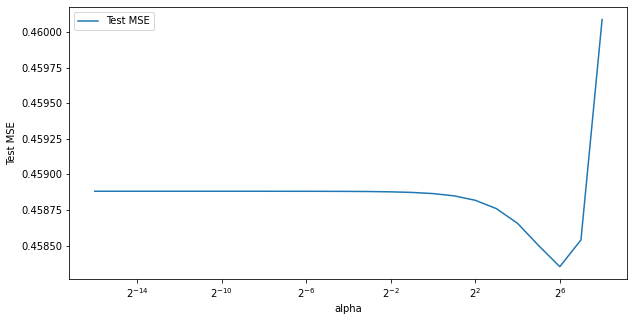

In [0]:
from matplotlib import pyplot as plt
# 見やすくするために最後の３つを表示していない
alphas, train_MSEs, test_MSEs = zip(*results[:-3])
plt.figure(figsize=(10,5))
plt.plot(alphas, test_MSEs, label="Test MSE")
plt.xscale('log', basex=2)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.show()